In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [7]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnorder = ['RDON', 'DON', 'DIN', 'Bp', 'Bh',  ]
ccnpalette = [RDONCOLOR,  DONCOLOR, DINCOLOR, PCOLOR, HCOLOR,]

cccpalette = [RDOCCOLOR, DOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['RDOC', 'DOC', 'DIC', 'Bp[C]', 'Bh[C]',]

ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [11]:
refdf = pd.read_csv('prelim_bottle.csv')


In [12]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [13]:
sum_df.shape

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

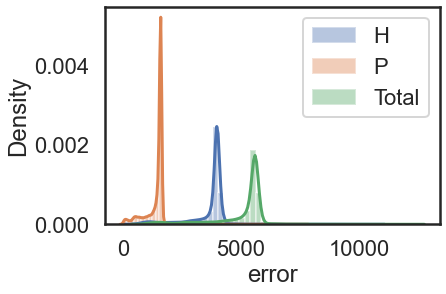

In [14]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [15]:
sum_df.nsmallest(columns='error', n=10)

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,VTmax,KT_h,omega,run_id,status,h_err,p_err,error,logerror,message
7992,0,1.285642e-07,5.205315e-07,0.294251,0.635775,6.625,6.625,0.000001,0.0,0.0,...,0.000224,0.250272,0.836322,de_h1473414371151674958,0,688.000910,33.637616,721.638526,6.581524,NaN
1953,0,2.088786e-07,4.992356e-07,0.429460,0.677698,6.625,6.625,0.000001,0.0,0.0,...,0.000031,0.250272,0.861480,de_h-3194898621793367320,0,631.238066,108.676500,739.914566,6.606535,NaN
9810,0,1.349859e-07,4.374877e-07,0.214600,0.891884,6.625,6.625,0.000001,0.0,0.0,...,0.000136,0.250272,0.724839,de_h3457979852209210473,0,626.466788,121.295974,747.762763,6.617086,NaN
599,0,2.769364e-07,8.570278e-07,0.670976,0.794126,6.625,6.625,0.000001,0.0,0.0,...,0.000008,0.250272,0.434719,de_h-1658904636526754102,0,275.441696,481.039775,756.481471,6.628678,NaN
2623,0,1.514581e-07,4.102932e-07,0.172133,0.702673,6.625,6.625,0.000001,0.0,0.0,...,0.000190,0.250272,0.822155,de_h-388268592027075237,0,681.879119,79.148802,761.027920,6.634670,NaN
1514,0,3.055465e-07,6.380217e-07,0.552534,0.850085,6.625,6.625,0.000001,0.0,0.0,...,0.000059,0.250272,0.847327,de_h-2735594600438524080,0,678.129500,83.600461,761.729960,6.635592,NaN
3624,0,2.254259e-07,4.457603e-07,0.400022,0.880236,6.625,6.625,0.000001,0.0,0.0,...,0.000133,0.250272,0.831100,de_h-5031821577676803499,0,641.047385,122.574726,763.622111,6.638073,NaN
7950,0,1.786088e-07,5.522206e-07,0.360314,0.532584,6.625,6.625,0.000001,0.0,0.0,...,0.000212,0.250272,0.729206,de_h1422404167950275571,0,741.030226,25.227892,766.258118,6.641519,NaN
10454,0,2.733440e-07,4.927718e-07,0.421881,0.773796,6.625,6.625,0.000001,0.0,0.0,...,0.000177,0.250272,0.800229,de_h4168502310542359997,0,694.167673,72.405341,766.573014,6.641930,NaN
10125,0,2.859632e-07,4.258575e-07,0.397553,0.783962,6.625,6.625,0.000001,0.0,0.0,...,0.000250,0.250272,0.577695,de_h3803629648764672375,0,711.418958,61.054426,772.473384,6.649598,NaN


In [16]:
df.head()

,Unnamed: 0,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,...,deathh,exudationOp,exudationIp,exudationOh,exudationIh,Treleasep,Tbreakdownh,Bp[C],Bh[C],run_id
0,0,1.100000,44.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,...,0.000105,7.534272e-06,0.0,0.0,0.000203,9.669578e-06,0.000000e+00,7.287500,291.500000,de_h-1000037321688616216
1,1,0.197863,27.356005,0.048004,5.665521,131.832607,0.008536,37.534075,3211.200514,0.000176,...,0.000065,1.355227e-06,0.0,0.0,0.000126,1.739315e-06,1.740298e-06,1.310839,181.233536,de_h-1000037321688616216
2,2,0.011591,6.778807,0.022789,8.773746,149.513066,0.008193,58.126068,3328.166849,0.000042,...,0.000016,7.939176e-08,0.0,0.0,0.000031,1.018924e-07,1.021217e-07,0.076791,44.909599,de_h-1000037321688616216
3,3,0.001727,2.643511,0.018014,9.382444,153.054303,0.008130,62.158694,3351.595972,0.000016,...,0.000006,1.183054e-08,0.0,0.0,0.000012,1.518346e-08,1.527087e-08,0.011443,17.513261,de_h-1000037321688616216
4,4,0.000282,1.076201,0.016247,9.611820,154.395451,0.008107,63.678305,3360.469390,0.000006,...,0.000003,1.928249e-09,0.0,0.0,0.000005,2.474738e-09,2.509705e-09,0.001865,7.129834,de_h-1000037321688616216


In [15]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 't',
       'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp', 'limINh',
       'limONh', 'limICh', 'limOCh', 'gross_uptakeINp', 'gross_uptakeONp',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeINh',
       'gross_uptakeONh', 'gross_uptakeICh', 'gross_uptakeOCh',
       'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp', 'overflowCp',
       'overflowNh', 'overflowCh', 'deathp', 'deathh', 'exudationOp',
       'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep', 'Tbreakdownh',
       'Bp[C]', 'Bh[C]', 'run_id'],
      dtype='object')

In [17]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [18]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

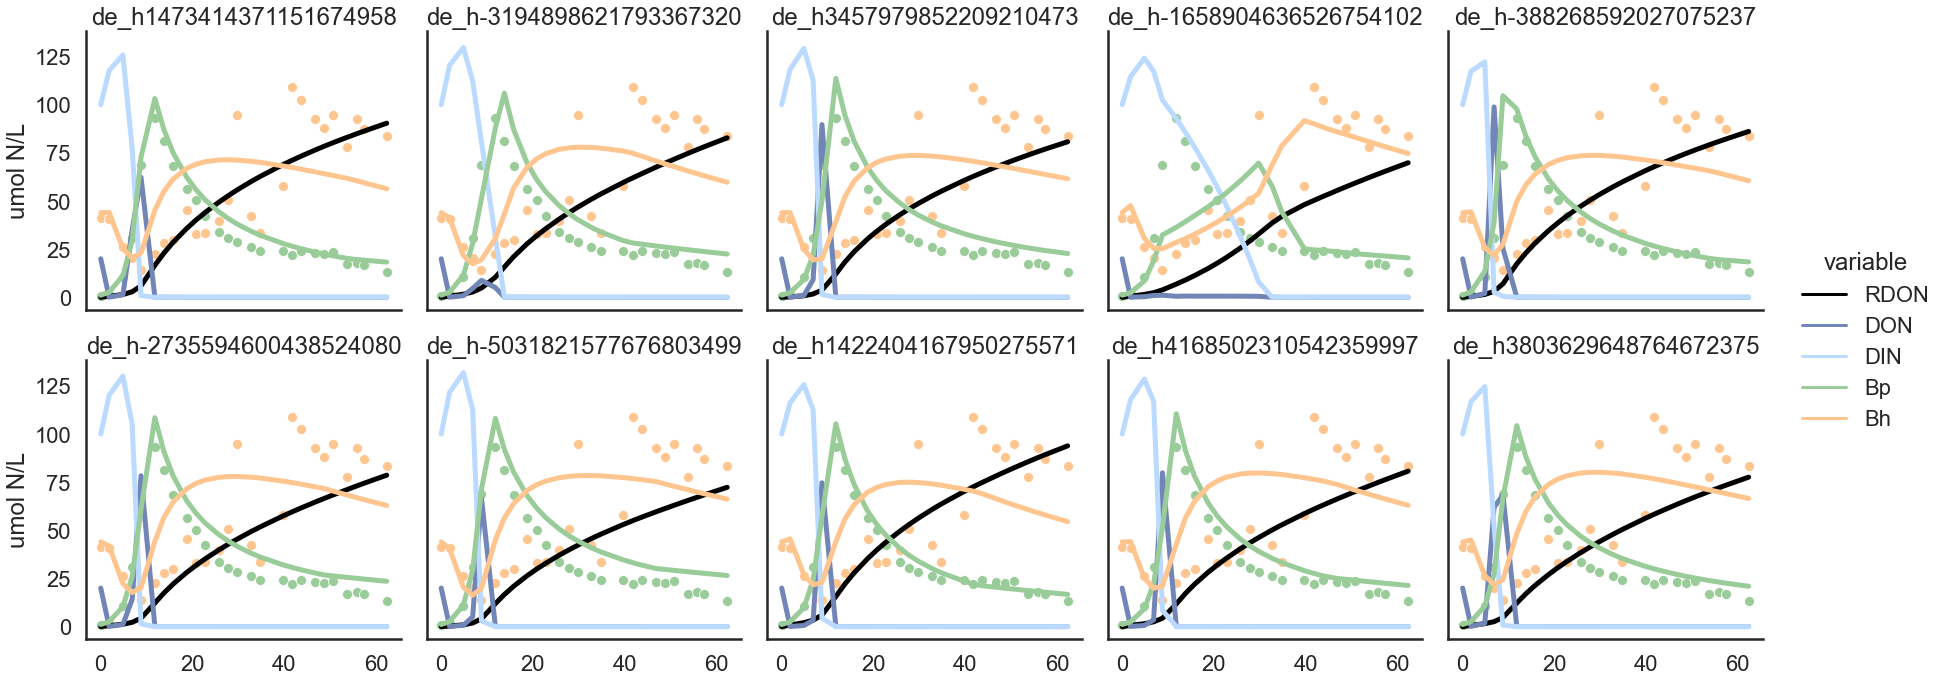

In [19]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



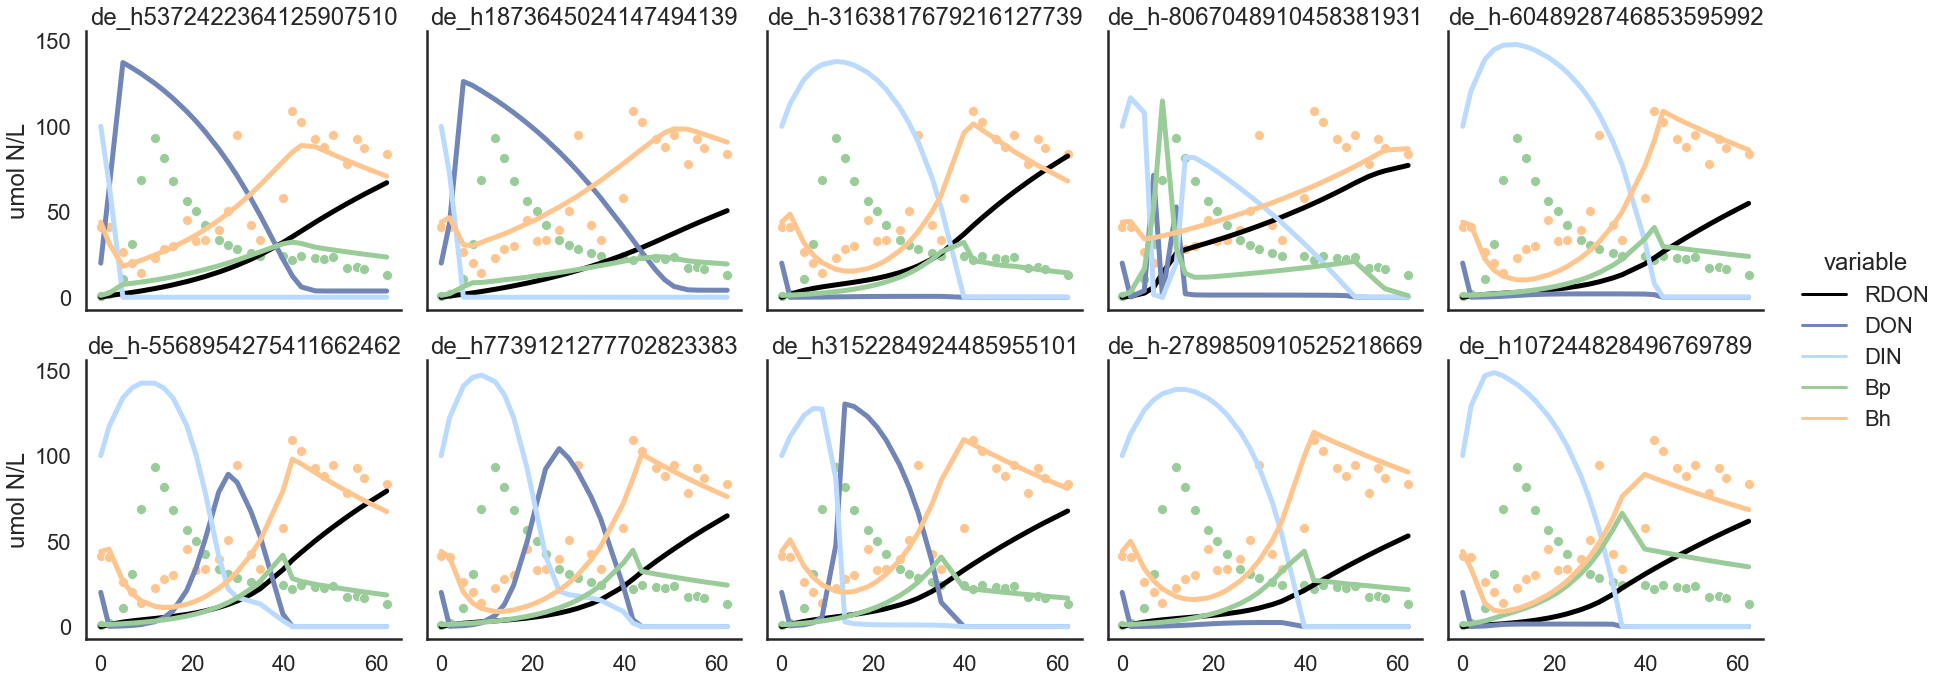

In [19]:
ids = list(sum_df.nsmallest(columns='h_err', n=10)['run_id'])
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



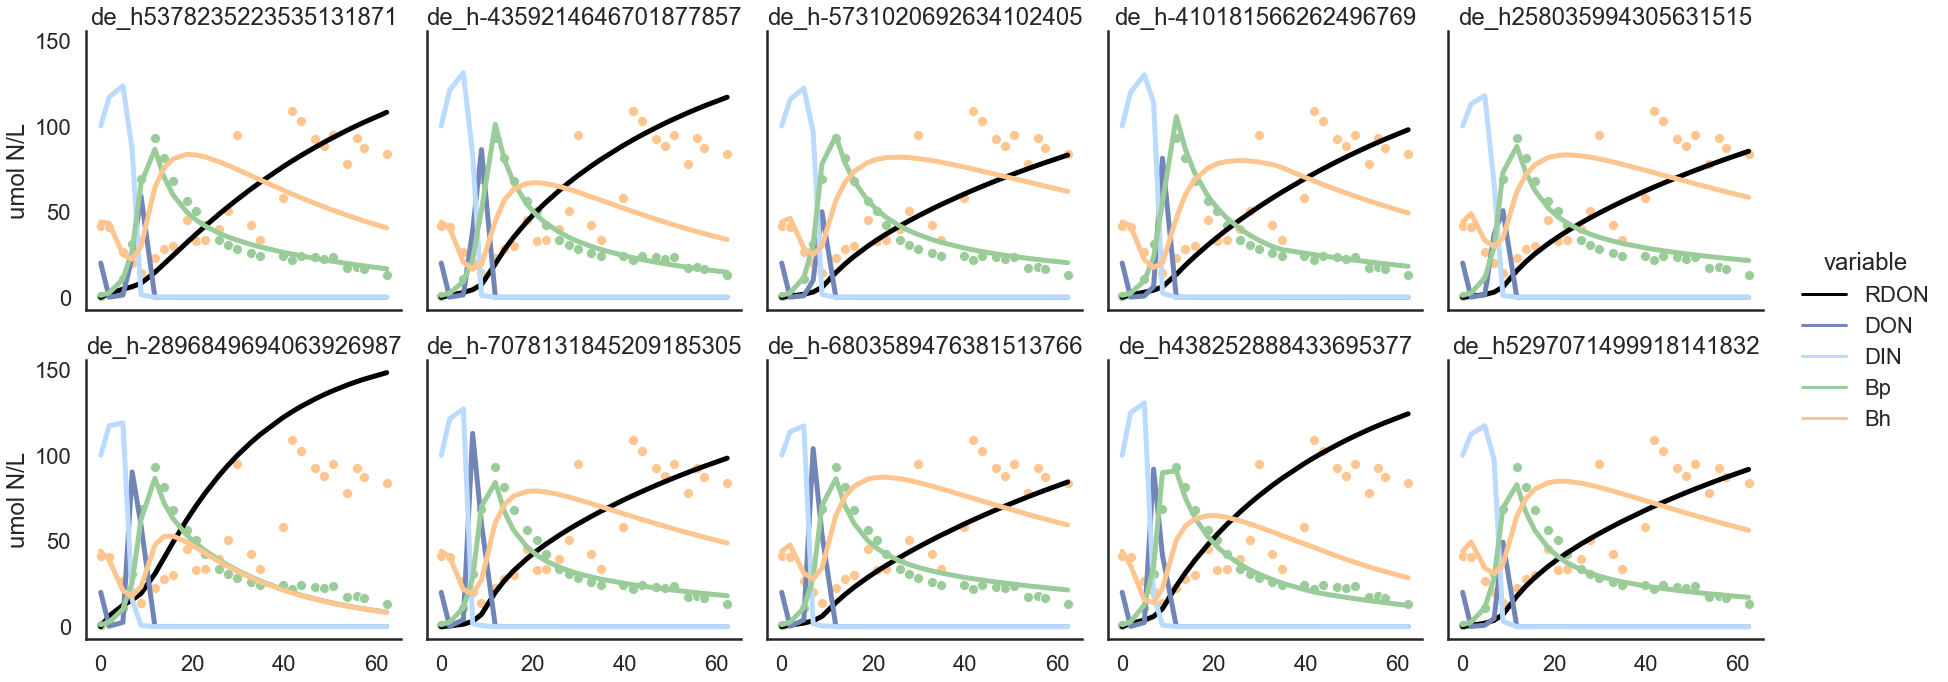

In [20]:
ids = list(sum_df.nsmallest(columns='p_err', n=10)['run_id'])
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [20]:
sum_df.nlargest(10, 'error', )

,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,E^O_h,...,VTmax,KT_h,omega,run_id,status,h_err,p_err,error,logerror,message
22767,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50186_h-661525229335330319,0,10820.629648,1582.519603,12403.149251,9.425706,NaN
56647,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50193_h7389789234214215084,0,10715.799280,1584.268917,12300.068197,9.417360,NaN
37163,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000003,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50181_h3500273286492293307,0,10617.240679,1583.104682,12200.345361,9.409220,NaN
55779,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000006,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50182_h4840293288657703940,0,10540.613955,1582.347813,12122.961768,9.402857,NaN
23712,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50198_h-7367080204635230668,0,10453.732848,1593.863720,12047.596568,9.396620,NaN
26991,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50189_h6663798420569005737,0,10427.176723,1580.836748,12008.013472,9.393329,NaN
1279,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,6.052653e-07,...,0.0002,4.291409,1.584961,se2_50183_h-5818457651647892162,0,10422.871503,1580.831945,12003.703447,9.392971,NaN
3354,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50199_h2430500784709283380,0,10387.573520,1580.911019,11968.484539,9.390032,NaN
24936,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50195_h-241338330038814488,0,10377.860526,1580.772883,11958.633409,9.389209,NaN
38592,0,9.607386e-08,4.803693e-07,0.376465,0.983887,6.625,6.625,0.000009,0.000010,1.307170e-06,...,0.0002,4.291409,1.584961,se2_50190_h6795647496206486337,0,10366.147154,1581.023796,11947.170950,9.388250,NaN


In [21]:
sum_df.nsmallest(columns='error', n=1).T

,7992
Unnamed: 0,0
M_h,0.0
M_p,0.000001
gamma^D_p,0.294251
gamma^D_h,0.635775
R_p,6.625
R_h,6.625
E^O_p,0.000001
E^I_p,0.0
E^O_h,0.0


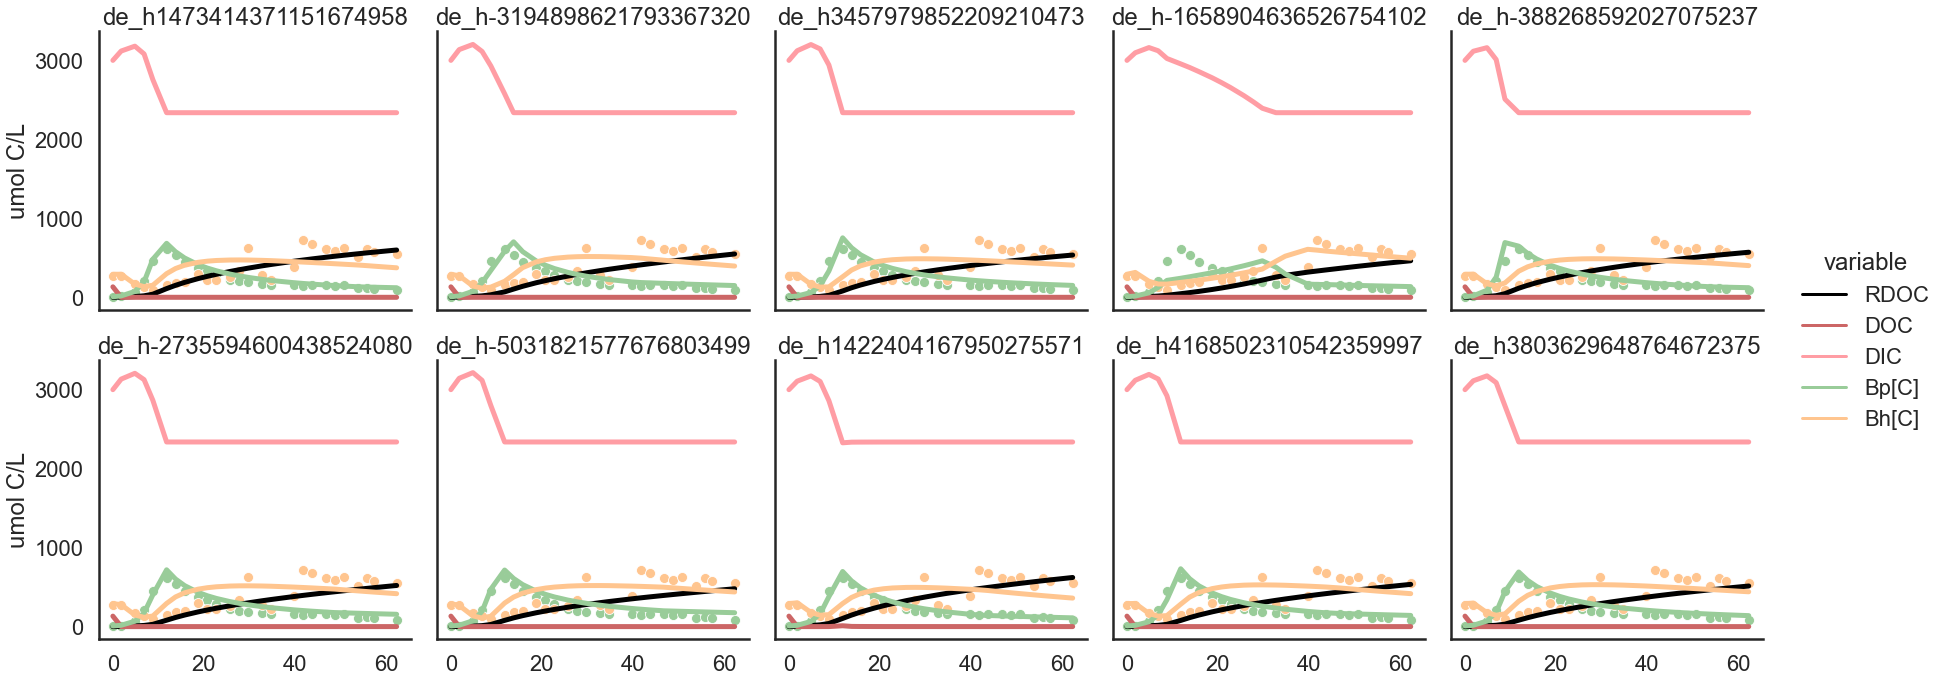

In [22]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [23]:
df.shape

In [24]:
import hdbscan


In [25]:
import umap

In [26]:
sample_cols = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']

sample_days = [ 5., 12., 16., 30., 44., 62.]

tdf = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols)]

In [27]:
tdf['day'] = tdf.day.round(0)
X = tdf.pivot(index='run_id', columns=['variable', 'day'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
X

value                          \
variable                              RDON                           
day                                   5.0         12.0        16.0   
run_id                                                               
de2_h-1003520175011203320        44.437058   87.227756  103.405837   
de2_h-1019665815094019527        13.922627   32.640270   42.200416   
de2_h-1020786051406382456        80.705139   94.627381   95.218445   
de2_h-1022442923317150120       136.543528  156.761171  157.749900   
de2_h-105571108410293302         96.443735  132.652214  145.303737   
...                                    ...         ...         ...   
se2_9998_h-7848897770075249976   61.580765  109.813538  125.052364   
se2_9999_h-1953685857847270712   99.201472  142.345755  150.740180   
se2_999_h-1202036302319600203   105.869273  128.813925  130.355111   
se2_99_h-3684070667581532512    101.771707  145.570773  152.796237   
se2_9_h-6289657653515340097      38.682050   63.804658   75.200027   

                                                                               \
variable                                                                  DON   
day                                   30.0        44.0        62.0       5.0    
run_id                                                                          
de2_h-1003520175011203320       134.343603  145.653478  150.475131   9.148836   
de2_h-1019665815094019527        70.327215   91.487233  111.799753   1.578869   
de2_h-1020786051406382456        95.305455   95.305512   95.305512  69.413842   
de2_h-1022442923317150120       157.974090  157.974446  157.974447   4.004893   
de2_h-105571108410293302        155.402923  156.273088  156.379132   4.615385   
...                                    ...         ...         ...        ...   
se2_9998_h-7848897770075249976  148.491957  154.226140  155.845118   5.388422   
se2_9999_h-1953685857847270712  157.741066  157.990717  157.999413   4.010118   
se2_999_h-1202036302319600203   130.836578  130.839716  130.839736  33.616159   
se2_99_h-3684070667581532512    157.884887  158.136649  158.149528   4.149116   
se2_9_h-6289657653515340097     105.535672  125.049739  140.714350   2.798150   

                                                                 ...  \
variable                                                         ...   
day                                  12.0       16.0       30.0  ...   
run_id                                                           ...   
de2_h-1003520175011203320        8.965127   8.937360   8.915695  ...   
de2_h-1019665815094019527        1.541349   1.519856   1.520249  ...   
de2_h-1020786051406382456       69.000558  69.113473  69.133028  ...   
de2_h-1022442923317150120        3.841638   3.823546   3.827792  ...   
de2_h-105571108410293302         3.422105   3.700708   3.409299  ...   
...                                   ...        ...        ...  ...   
se2_9998_h-7848897770075249976   5.767294   6.774894   6.571463  ...   
se2_9999_h-1953685857847270712   5.494737   4.779149   4.964321  ...   
se2_999_h-1202036302319600203   33.594852  33.596329  33.596747  ...   
se2_99_h-3684070667581532512     4.132433   4.132374   4.132375  ...   
se2_9_h-6289657653515340097      2.594346   2.587233   2.585754  ...   

                                                                       \
variable                                DOC                             
day                                    16.0         30.0         44.0   
run_id                                                                  
de2_h-1003520175011203320       2406.624688  2405.880830  2405.829211   
de2_h-1019665815094019527          7.434706     7.405599     7.404996   
de2_h-1020786051406382456          7.546368     7.507426     7.507391   
de2_h-1022442923317150120          1.342030     1.275775     1.276004   
de2_h-105571108410293302         114.651917    44.145886    39.913633   
...                             

In [29]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(X)

In [30]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [31]:
udf['run_id'] = X.index

In [32]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [33]:
udf['logerror'] = np.log(udf['error'])

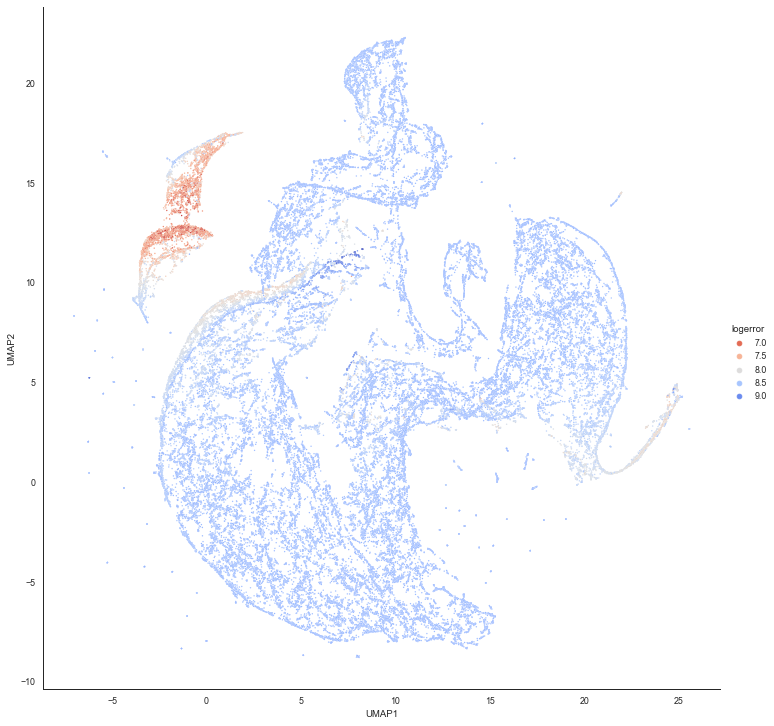

In [34]:
sns.set_context('paper')
sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='logerror', s=2, height=10, aspect=1, palette='coolwarm_r')

In [270]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=400, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 20.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(X)


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=400, min_samples=5)

In [271]:
clusterer.labels_

array([ 3,  0,  0, ...,  3, -1,  0], dtype=int64)

In [272]:
clusterer.labels_.max()

3

In [273]:
(clusterer.labels_ < 0).sum()

11627

In [274]:
udf.shape

In [275]:
udf['cluster'] = clusterer.labels_

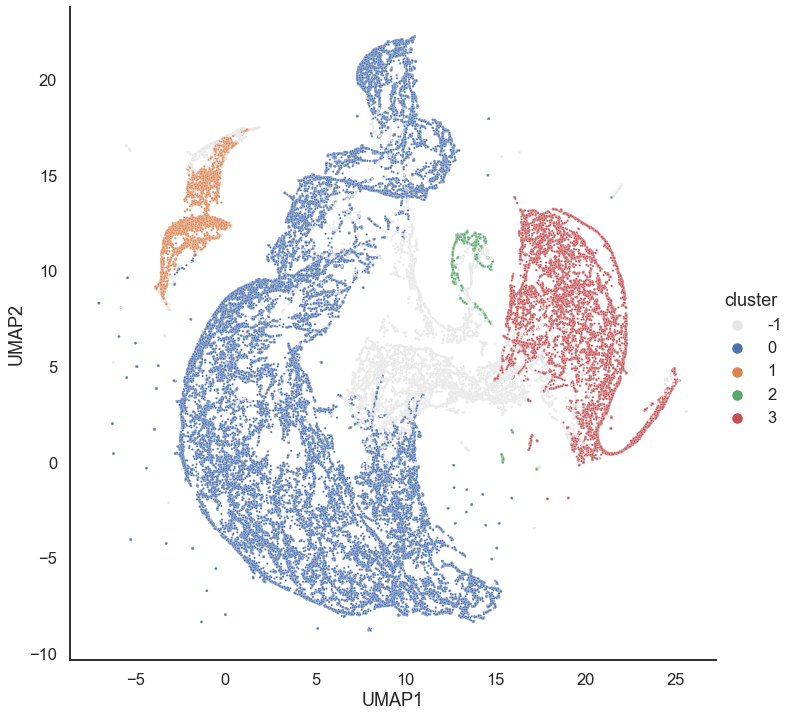

In [276]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

<AxesSubplot:ylabel='$\\lambda$ value'>

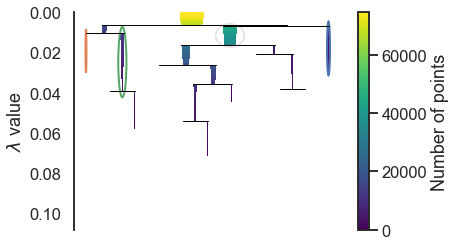

In [277]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cpalette)

In [278]:
udf.groupby('cluster')['error'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,11627.0,5057.473577,1028.477856,756.481471,4821.054006,5519.874809,5611.170908,11273.180187
0,44301.0,5400.141712,713.939987,2047.766559,5401.595175,5586.738858,5632.047230,12403.149251
1,4599.0,1940.840584,916.518400,721.638526,1325.975916,1652.211102,2239.456827,6974.971461
2,1426.0,5652.598571,48.775298,5415.415276,5637.940573,5662.746213,5680.932521,5938.292227
3,12577.0,5036.653246,825.564233,2224.912143,4828.693437,5455.286326,5570.985187,6338.693191


In [279]:
udf.head()

,UMAP1,UMAP2,run_id,Unnamed: 0,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,...,VTmax,KT_h,omega,status,h_err,p_err,error,logerror,message,cluster
0,20.221712,3.009346,de2_h-1003520175011203320,0,5.873991e-06,0.000002,0.435821,0.866970,6.625,6.625,...,8.835720e-05,5.722236,1.655559,0,3889.949813,1382.060093,5272.009906,8.570167,NaN,3
1,4.738433,7.897155,de2_h-1019665815094019527,0,2.912892e-06,0.000002,0.861985,0.919232,6.625,6.625,...,8.613593e-05,9.106378,0.421618,0,4064.284582,1458.908619,5523.193201,8.616711,NaN,0
2,3.267959,11.598664,de2_h-1020786051406382456,0,7.231211e-06,0.000007,0.736024,0.376154,6.625,6.625,...,2.015296e-04,12.728721,0.776036,0,3971.384341,1604.596846,5575.981186,8.626224,NaN,0
3,10.783566,-7.260574,de2_h-1022442923317150120,0,7.860829e-06,0.000009,0.261886,0.431050,6.625,6.625,...,1.899946e-04,19.619042,0.953672,0,3974.468058,1610.118819,5584.586877,8.627766,NaN,0
4,7.794780,-2.272591,de2_h-105571108410293302,0,9.847795e-07,0.000009,0.216266,0.024306,6.625,6.625,...,3.349666e-07,3.467098,0.482748,0,3924.817950,1530.779472,5455.597422,8.604397,NaN,-1


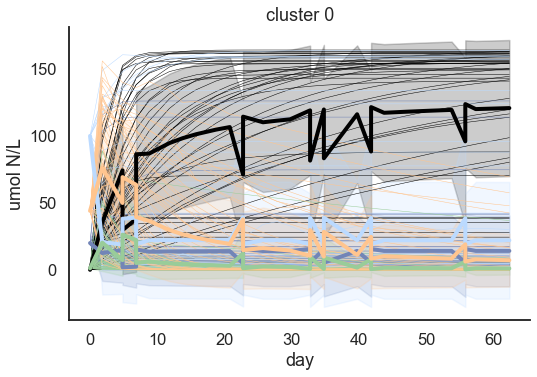

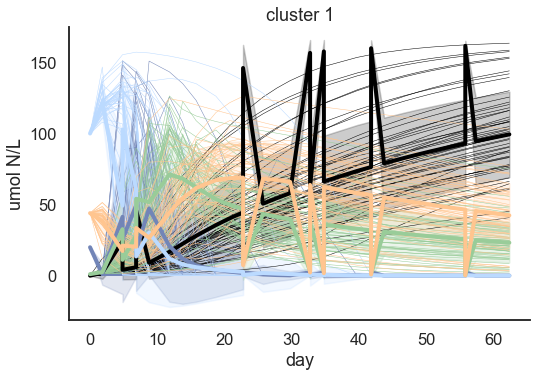

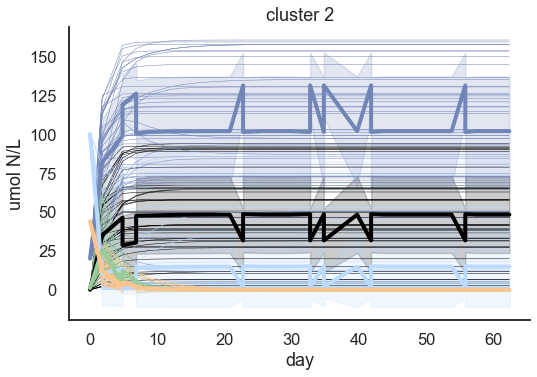

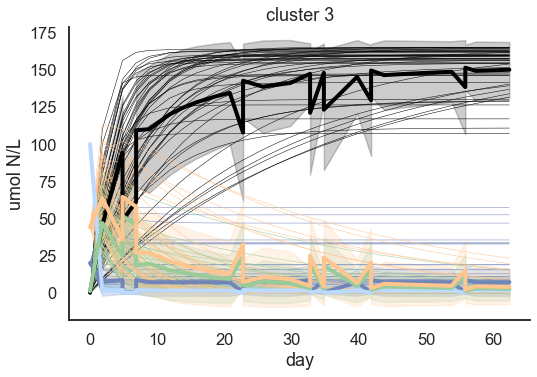

In [282]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

def pp2(data, **kwargs):
    print(data)
    sns.lineplot(
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
    )


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=4, ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


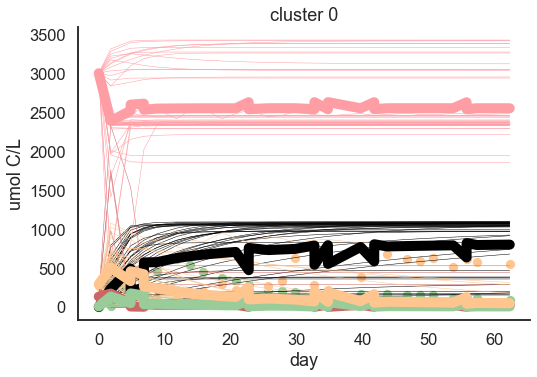

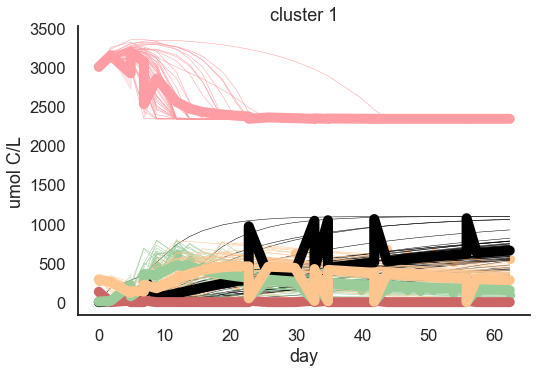

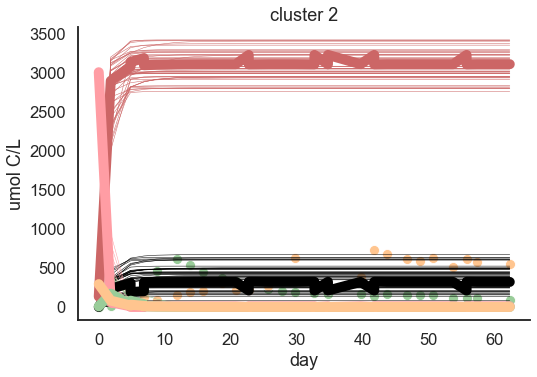

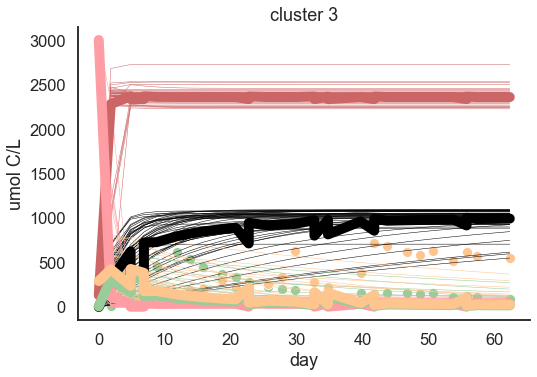

In [281]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

def pp2(data, **kwargs):
    print(data)
    sns.lineplot(
        x='day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
    )


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(ids)]
    atdf = mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10,
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [54]:
udf.head()

,UMAP1,UMAP2,run_id,error,cluster
0,-1.407559,-5.732627,de_h-1000037321688616216,5600.855680,2
1,0.799372,-8.213336,de_h-1003234812744863186,5593.301768,2
2,6.527477,19.263016,de_h-1003600340430498967,5568.261242,4
3,12.035246,11.213881,de_h-1004700782046925531,5575.047546,0
4,11.153156,4.373990,de_h-1007391539205323316,3714.509563,0


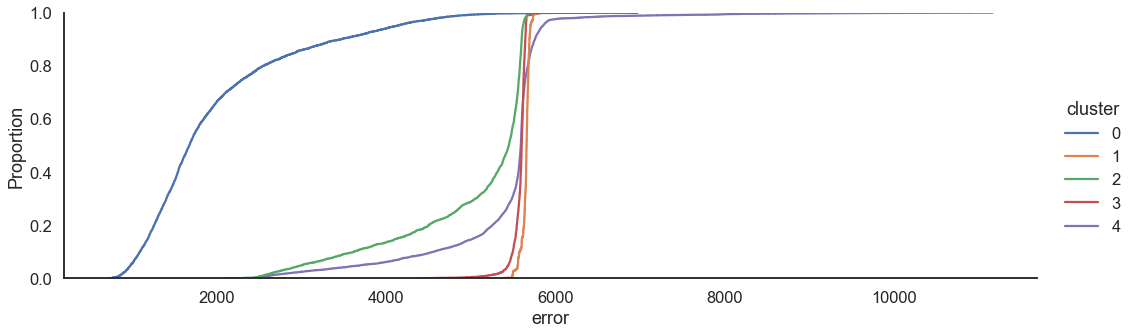

In [227]:
sns.displot(data=udf.loc[udf.cluster>=0], 
            x='error', hue='cluster', palette=cpalette[1:], aspect=3, kind='ecdf')

In [71]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

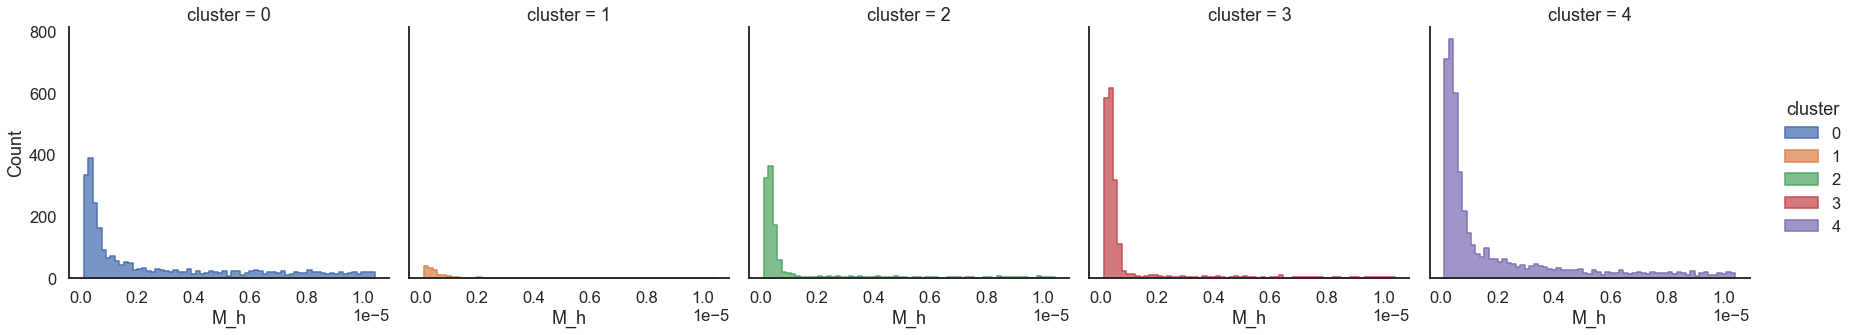

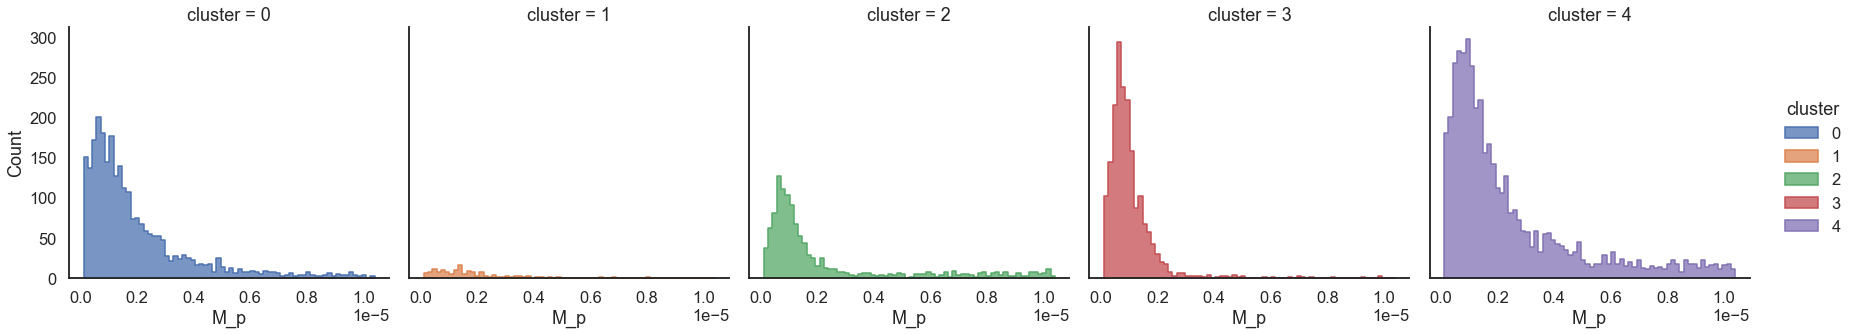

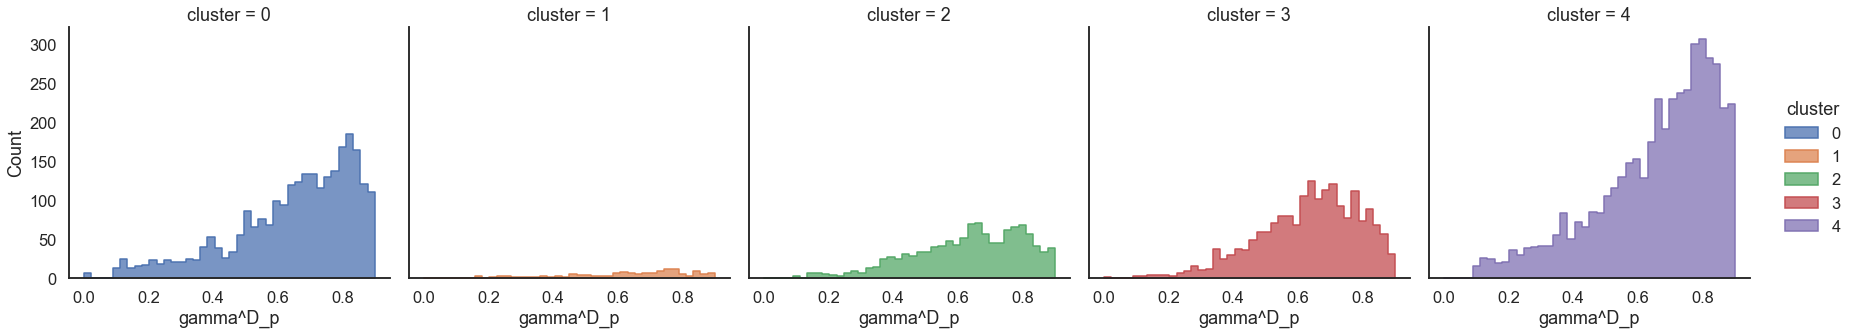

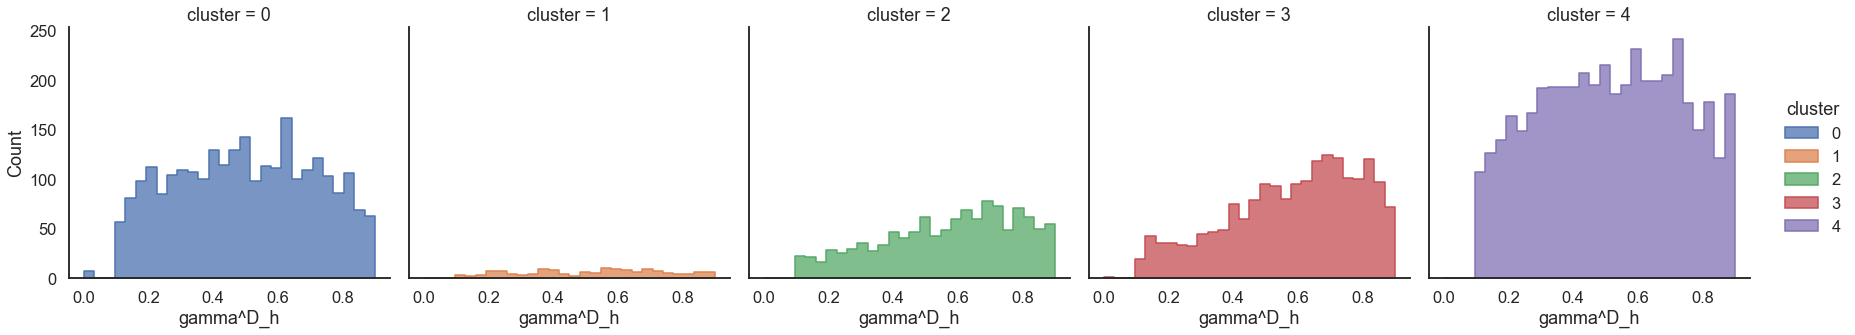

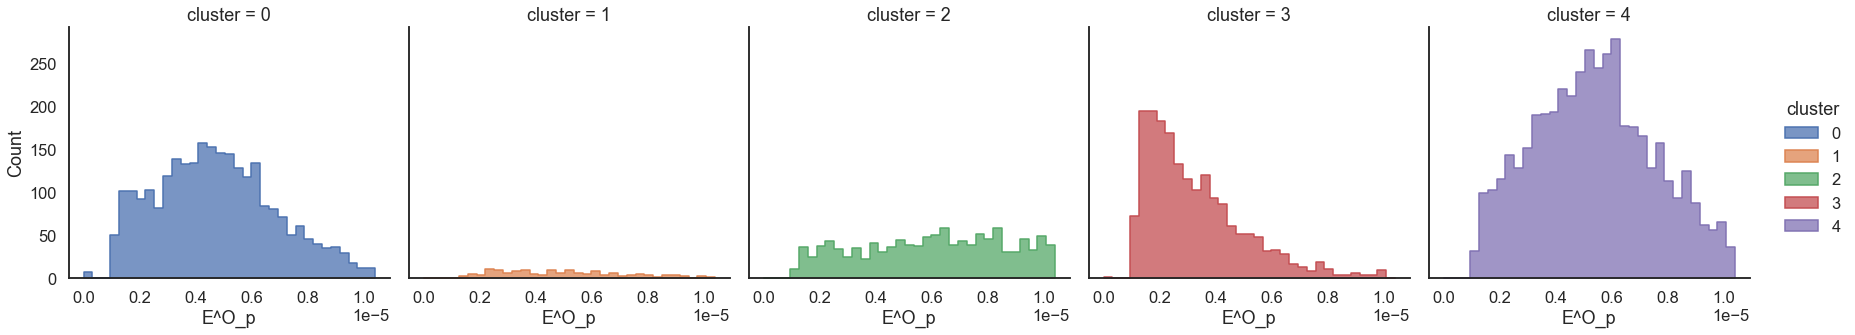

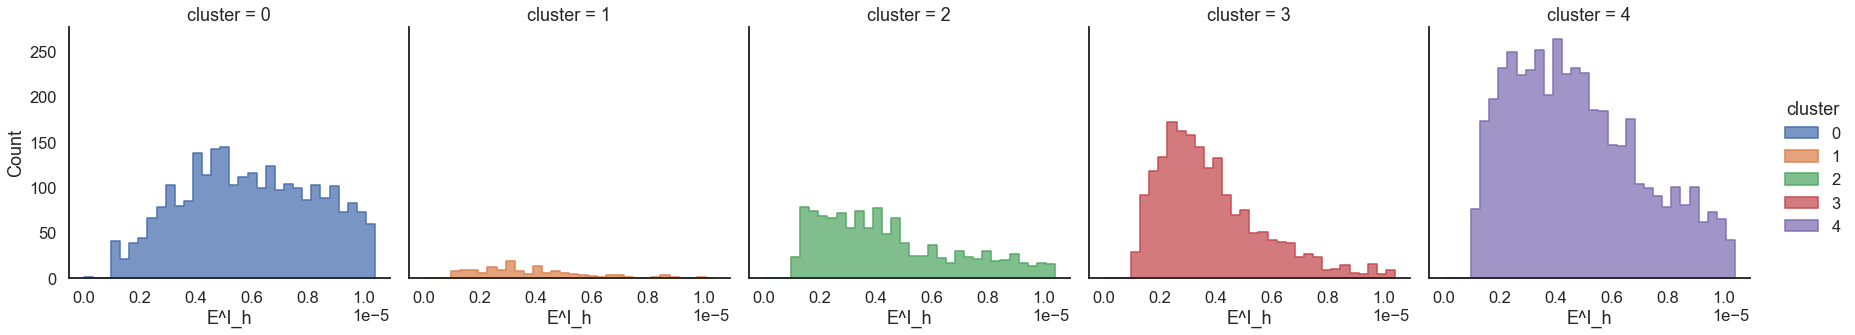

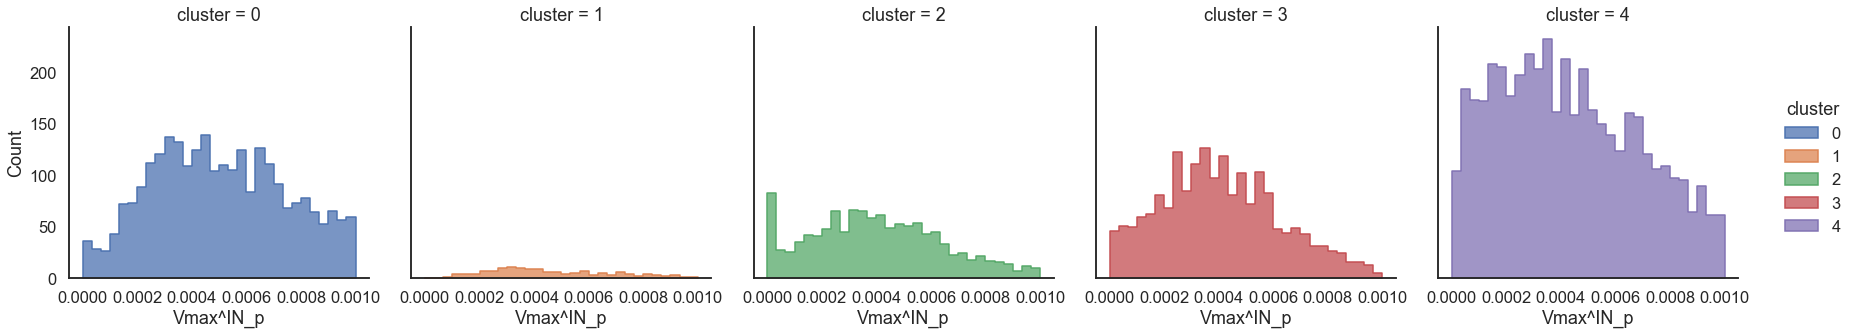

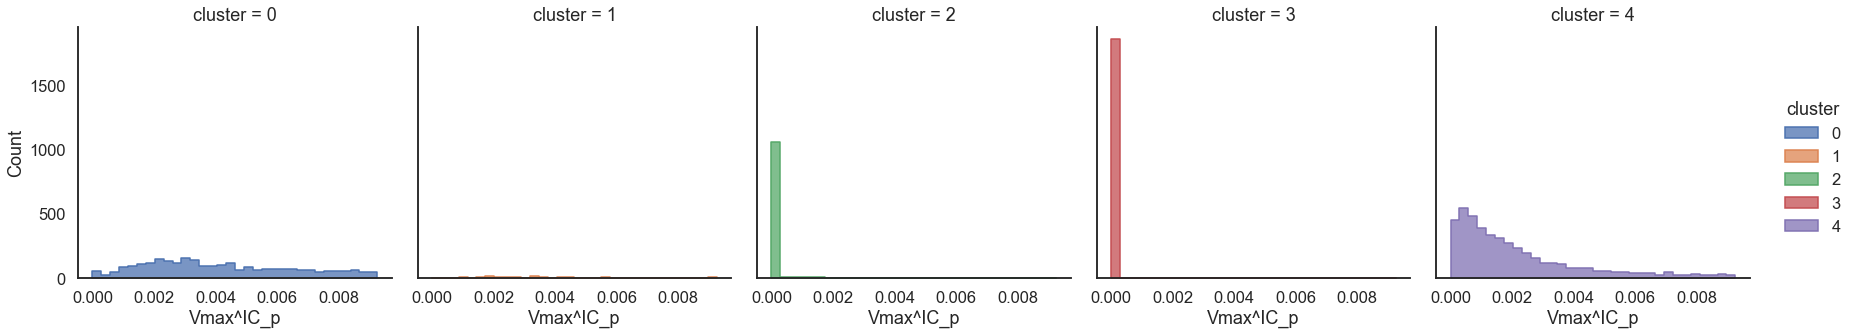

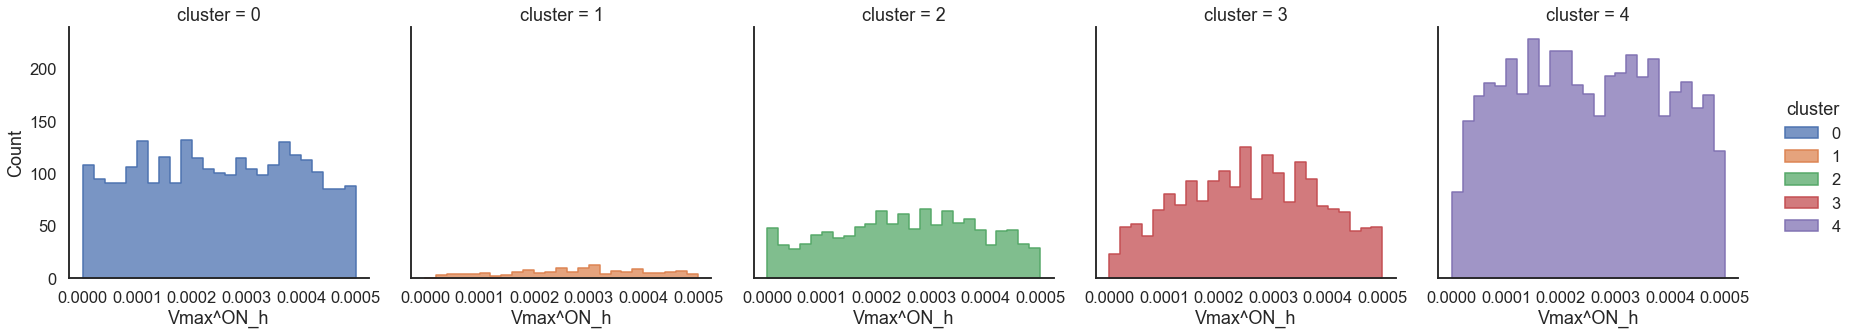

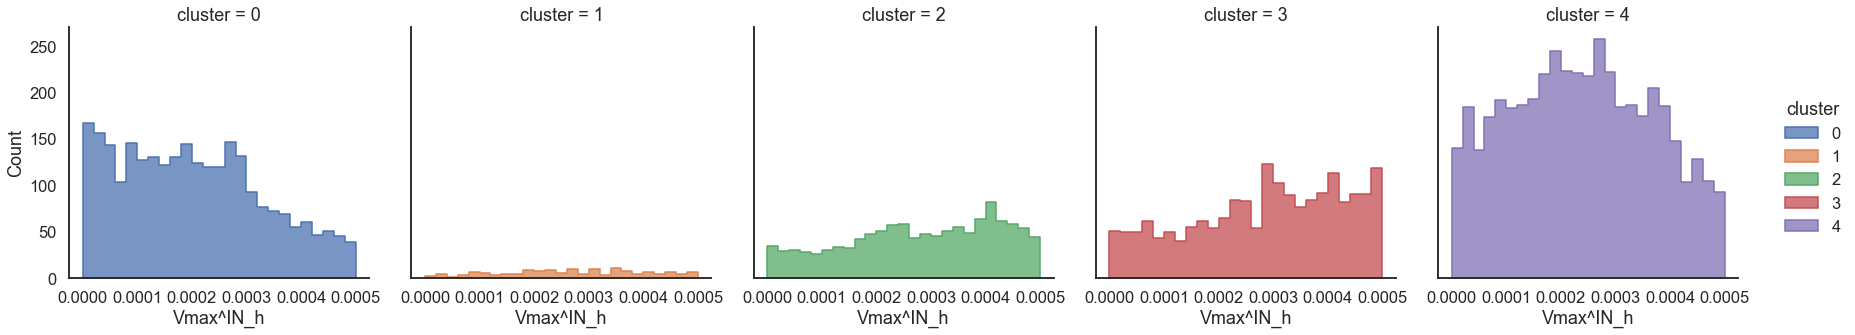

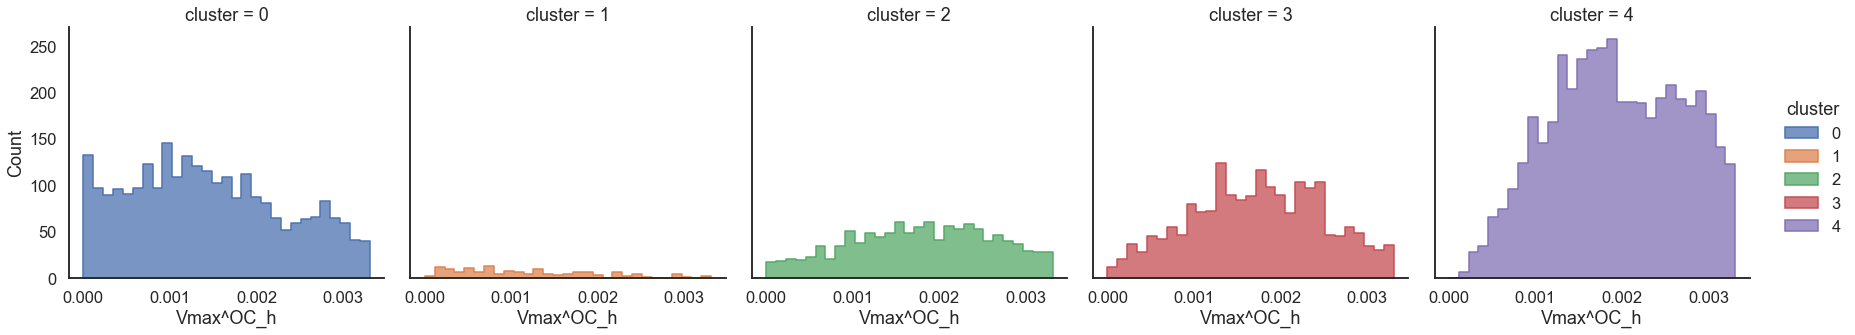

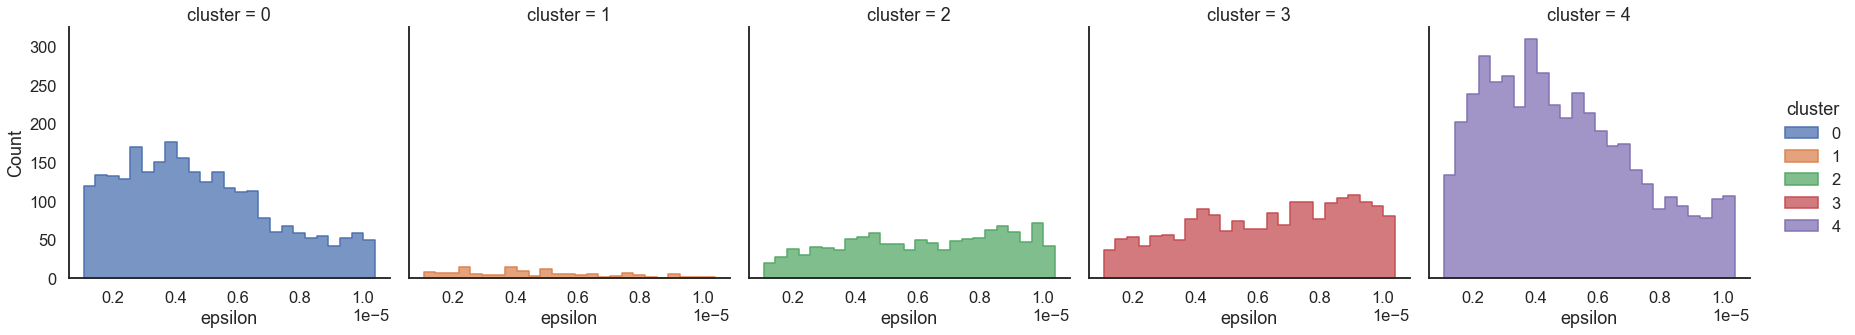

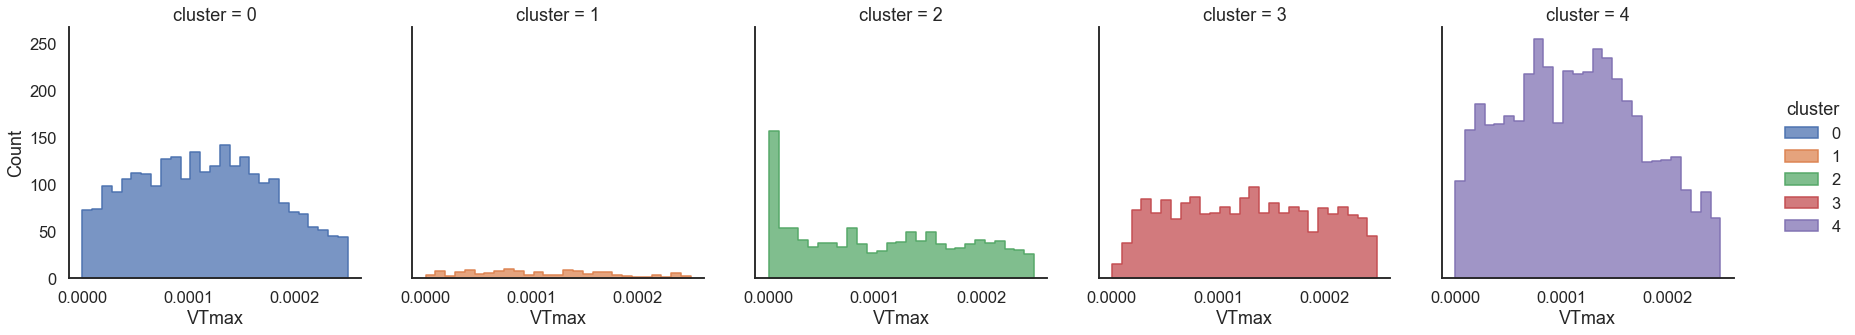

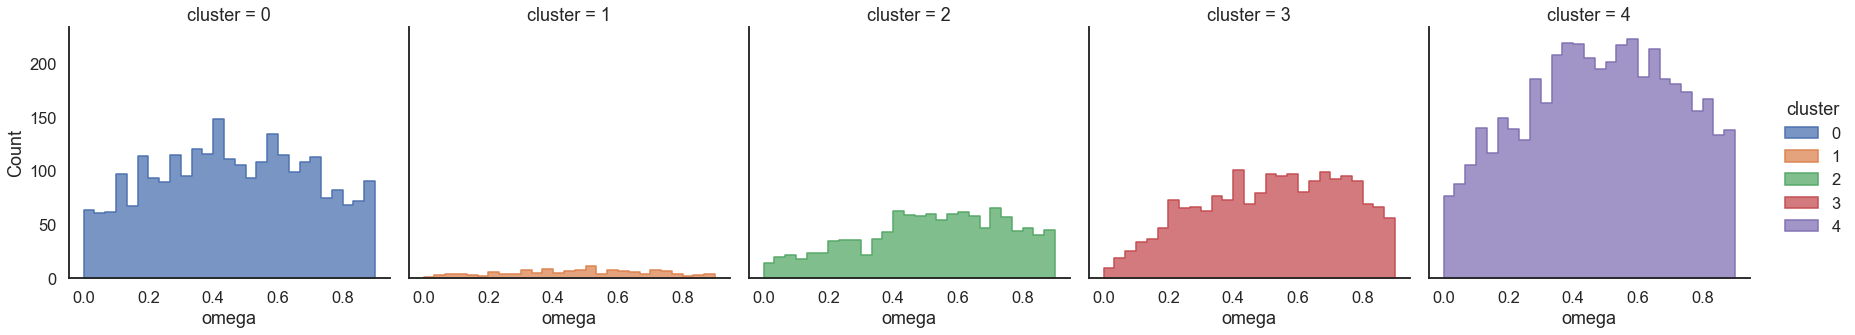

In [85]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

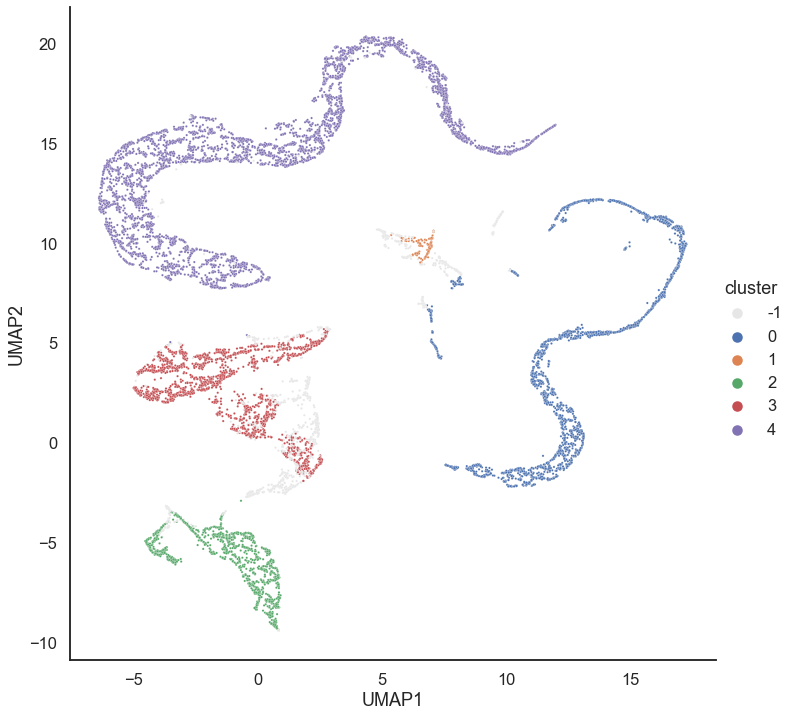

In [86]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')